#### Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visualize the obtained rules using different plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("my_movies.csv")

In [4]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df.shape

(10, 15)

In [10]:
df.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [11]:
# creating total of each movies
Total_Movie=df.sum()
Total_Movie

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

<AxesSubplot:>

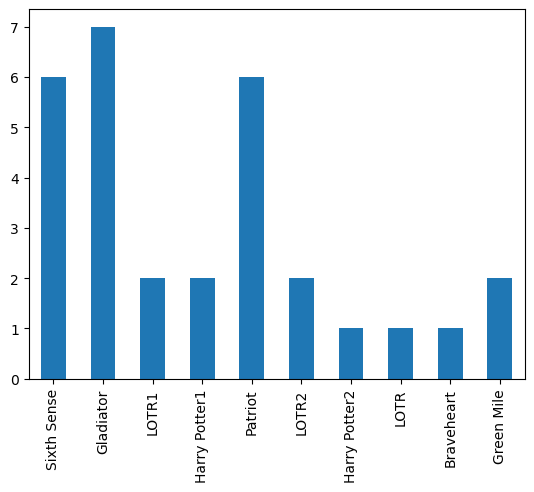

In [12]:
Total_Movie.plot.bar()

#### 1. Apriori algorithm with iterating support values and keeping min confidence=0.5

In [25]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df,min_support=s,use_colnames=True)
    rules = association_rules(frequent_item,metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [26]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,53,216
1,0.02,53,216
2,0.03,53,216
3,0.04,53,216
4,0.05,53,216


(0.0, 226.6)

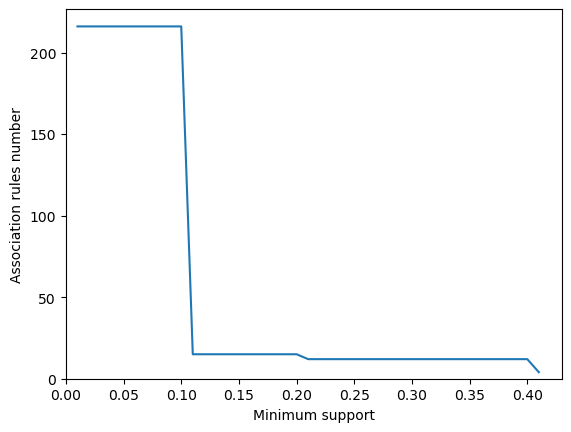

In [27]:
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number")
plt.xlim(0,)
plt.ylim(0,)

 ### 2. Apriori algorithm with iterating confidence values and min support =0.01

In [28]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [29]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,53,250
1,0.125,53,250
2,0.150,53,242
3,0.175,53,220
4,0.200,53,220


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

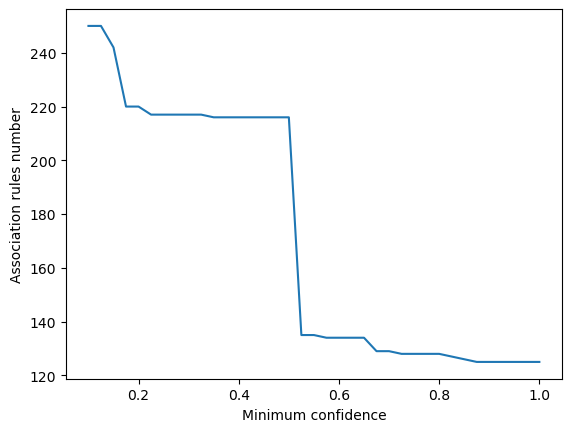

In [30]:
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number")

As minimum confidence value is increased,number of association rules keep on gradually decreasing.Above min confidence=0.4,there is steep decrease in number of association rules.This shows that as threshold of confidence increases,fewer frequent itemsets are generated and fewer rules are formed.

### Changing min length in apriori algorithm and observing the changes in number of association rules formed

Here min support is considered as 0.01 and min confidence as 0.5

In [31]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,60):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 59


In [32]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,10,0
1,2,30,31
2,3,46,110
3,4,52,187
4,5,53,216


(0.0, 226.8)

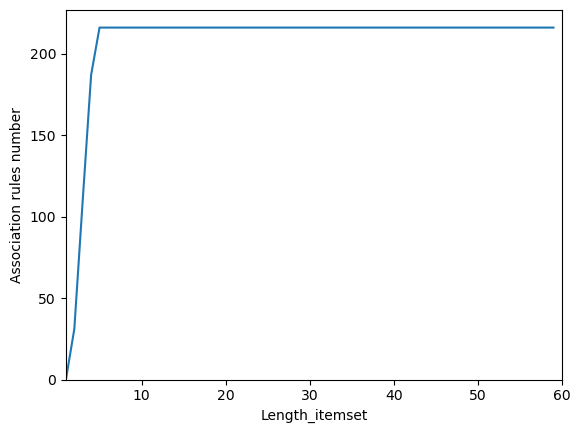

In [33]:
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number")
plt.xlim(1,60)
plt.ylim(0,)

Number of association rules formed keep on increasing with increasing length of item sets and becomes at length~5 and beyond

#### Association rules generation by running Apriori with min support=0.01 and min confidence=0.5

In [34]:
# generating frequent itemset
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [35]:
print("Number of frequent itemsets generated with min support=0.1 is:",(frequent_itemsets.shape[0]))

Number of frequent itemsets generated with min support=0.1 is: 53


In [36]:
# adding a length column which stores the length of item sets generated
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [37]:
frequent_itemsets.head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [38]:
# checking the number of frequent itemsets generated for each length
frequent_itemsets['length'].value_counts()

2    20
3    16
1    10
4     6
5     1
Name: length, dtype: int64

In [39]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [40]:
# Checking statistical summary of rules generated
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0
mean,0.166667,0.243981,0.120833,0.799118,4.954659,0.073056,inf
std,0.117335,0.198508,0.082863,0.240568,2.879200,0.027835,NaN
min,0.100000,0.100000,0.100000,0.500000,0.714286,-0.040000,0.6
25%,0.100000,0.100000,0.100000,0.500000,2.500000,0.060000,1.8
50%,0.100000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN
75%,0.200000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN
max,0.700000,0.700000,0.600000,1.000000,10.000000,0.180000,inf


In [41]:
print("Total number of association rules generated with min support=0.01 and min confidence=0.5 is:",(rules.shape[0]))

Total number of association rules generated with min support=0.01 and min confidence=0.5 is: 216


### Visualization of Association rules

### 1.Scatter Plot 

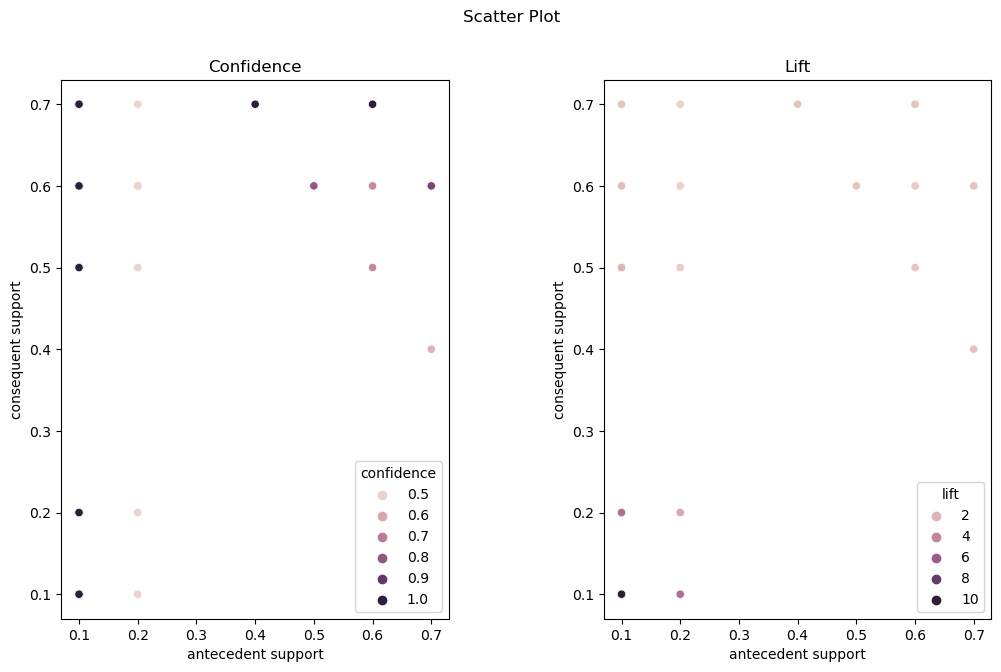

In [42]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The first subplot shows relationship of antecedent and consequent support with confidence which is shown in color gradient.Deep colors indicate high confidence and light colors indicate low confidence.We can see that dark points are concentrated near lower values of x axis.This means high confidence is observed for lower antecedent support values.


+ The second subplot shows  relationship of lift with antecedent and consequent support.Dark color indicates highest lift values.The plot shows taht maximum rules have lift values in range 2-4. Higher values around 8-10 is almost minimal and that too found for very low antecedent and consequent support.

### 2. Heatmap
 

To generate heatmap, we will consider a subset of first ten rules else the heatmap table will be too crowded to draw inferences.

In [43]:
rules_map=rules.copy()

In [44]:
# selecting rules with high confidence,lift and support
rules_map=rules_map.loc[(rules_map['lift']>9)& (rules_map['confidence']>0.8)& (rules_map['support']>0.05)]

In [45]:
rules_map.reset_index(drop=True,inplace=True)

In [46]:
# creating a subset of first 10 rules which will be plotted with heatmap
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
1,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
2,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
5,(LOTR),"(Green Mile, Sixth Sense, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
6,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
7,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
8,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
9,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [47]:
# converting antecedents and consequents to strings
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))

In [48]:
print(rules_10[['antecedents','consequents']])

                        antecedents                       consequents
0              Green Mile,Gladiator                              LOTR
1                              LOTR              Green Mile,Gladiator
2  Green Mile,Sixth Sense,Gladiator                              LOTR
3              Green Mile,Gladiator                  LOTR,Sixth Sense
4                  LOTR,Sixth Sense              Green Mile,Gladiator
5                              LOTR  Green Mile,Sixth Sense,Gladiator
6                 LOTR2,Sixth Sense               Harry Potter1,LOTR1
7               LOTR2,Harry Potter1                 Sixth Sense,LOTR1
8                 Sixth Sense,LOTR1               LOTR2,Harry Potter1
9               Harry Potter1,LOTR1                 LOTR2,Sixth Sense


In [49]:
# Constructing  pivot table
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

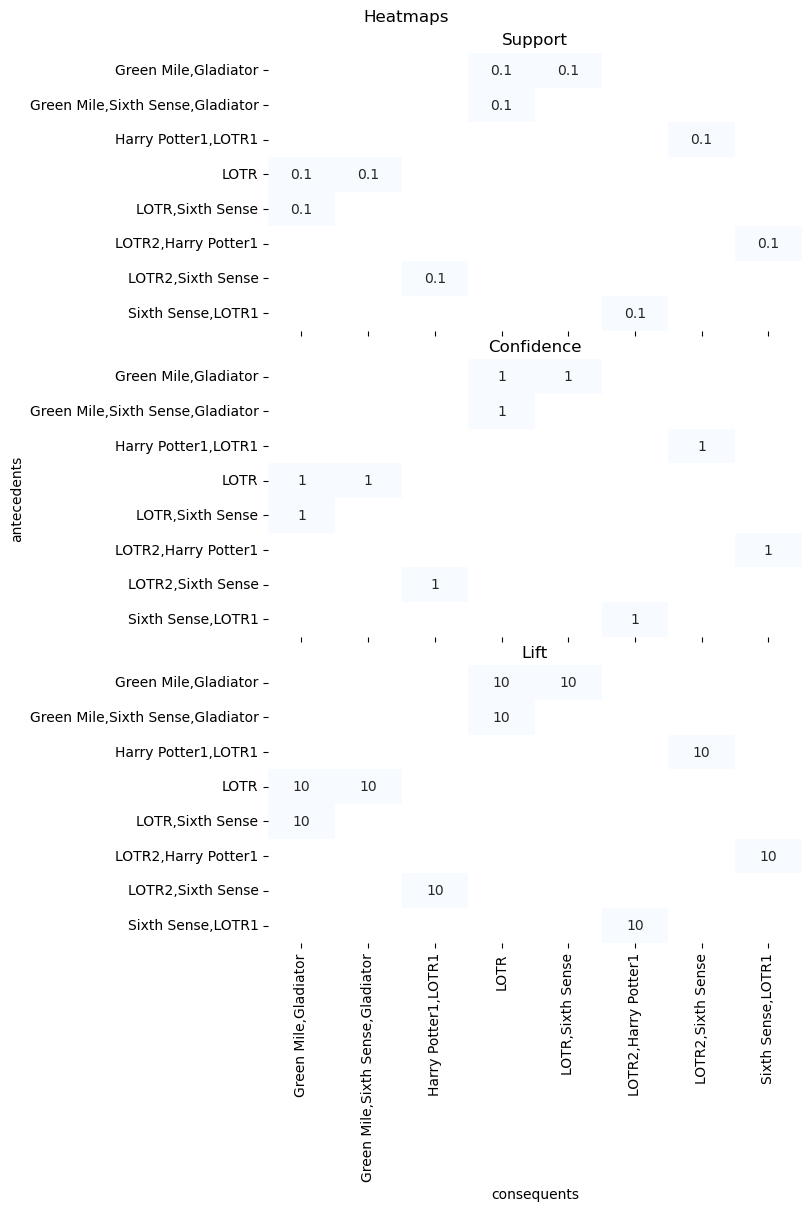

In [50]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()